In [1]:
import urllib.request
import json
import pprint
import requests
import time
import random
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import csv
import pandas as pd
from pandas import DataFrame
import numpy as np

In [2]:
#Climate Change pages
WWF_posts = pd.read_csv('/Users/Macbook/WWF_posts.csv')
WWF_posts = WWF_posts.drop('Unnamed: 0', axis=1)

WWF_comments = pd.read_csv('/Users/Macbook/WWF_comments.csv')
WWF_comments = WWF_comments.drop('Unnamed: 0', axis=1)

NASACC_posts = pd.read_csv('/Users/Macbook/NASACC_posts.csv')
NASACC_posts = NASACC_posts.drop('Unnamed: 0', axis=1)

NASACC_comments = pd.read_csv('/Users/Macbook/NASACC_comments.csv')
NASACC_comments = NASACC_comments.drop('Unnamed: 0', axis=1)

CR_posts = pd.read_csv('/Users/Macbook/CR_posts.csv')
CR_posts = CR_posts.drop('Unnamed: 0', axis=1)

CR_comments = pd.read_csv('/Users/Macbook/CR_comments.csv')
CR_comments = CR_comments.drop('Unnamed: 0', axis=1)


#Pro-immigration pages
IRC_posts = pd.read_csv('/Users/Macbook/IRC_posts.csv')
IRC_posts = IRC_posts.drop('Unnamed: 0', axis=1)

IRC_comments = pd.read_csv('/Users/Macbook/IRC_comments.csv')
IRC_comments = IRC_comments.drop('Unnamed: 0', axis=1)

amnesty_posts = pd.read_csv('/Users/Macbook/amnesty_posts.csv')
amnesty_posts = amnesty_posts.drop('Unnamed: 0', axis=1)

amnesty_comments = pd.read_csv('/Users/Macbook/amnesty_comments.csv')
amnesty_comments = amnesty_comments.drop('Unnamed: 0', axis=1)

ACLU_posts = pd.read_csv('/Users/Macbook/aclu_posts.csv')
ACLU_posts = ACLU_posts.drop('Unnamed: 0', axis=1)

ACLU_comments = pd.read_csv('/Users/Macbook/aclu_comments.csv')
ACLU_comments = ACLU_comments.drop('Unnamed: 0', axis=1)

In [3]:
# Merging comment and share data (Climate)
WWF_comments = WWF_comments.groupby('day').count()
WWF_comments = WWF_comments.drop('Message',axis=1)
WWF_posts = WWF_posts.groupby('day').sum()

WWF = WWF_posts.merge(WWF_comments, left_index=True, right_index=True)
WWF = WWF.loc['2017-03-22 ':'2018-01-29 ']

NASACC_comments = NASACC_comments.groupby('day').count()
NASACC_comments = NASACC_comments.drop('Message',axis=1)
NASACC_posts = NASACC_posts.groupby('day').sum()

NASACC = NASACC_posts.merge(NASACC_comments, left_index=True, right_index=True)
NASACC = NASACC.loc['2017-03-22 ':'2018-01-29 ']

CR_comments = CR_comments.groupby('day').count()
CR_comments = CR_comments.drop('Message',axis=1)
CR_posts = CR_posts.groupby('day').sum()

CR = CR_posts.merge(CR_comments, left_index=True, right_index=True)
CR = CR.loc['2017-03-22 ':'2018-01-29 ']

# Merging comment and share data (Immigration)
IRC_comments = IRC_comments.groupby('day').count()
IRC_comments = IRC_comments.drop('Message',axis=1)
IRC_posts = IRC_posts.groupby('day').sum()

IRC = IRC_posts.merge(IRC_comments, left_index=True, right_index=True)

amnesty_comments = amnesty_comments.groupby('day').count()
amnesty_comments = amnesty_comments.drop('Message',axis=1)
amnesty_posts = amnesty_posts.groupby('day').sum()

amnesty = amnesty_posts.merge(amnesty_comments, left_index=True, right_index=True)

ACLU_comments = ACLU_comments.groupby('day').count()
ACLU_comments = ACLU_comments.drop('Message',axis=1)
ACLU_posts = ACLU_posts.groupby('day').sum()

ACLU = ACLU_posts.merge(ACLU_comments, left_index=True, right_index=True)

,mean_shares_before,mean_shares_after
WWF,378.571,697
NASACC,343.5,458
CR,2749.4,587.875


,mean_shares_before,mean_shares_after,mean_comments_before,mean_comments_after
WWF,NaN,NaN,30,14
NASACC,NaN,NaN,10.6667,18.5
CR,NaN,NaN,1,1


,mean_comments_before,mean_comments_after
WWF,16.6667,18.7143
NASACC,15,13
CR,23.8571,47.875


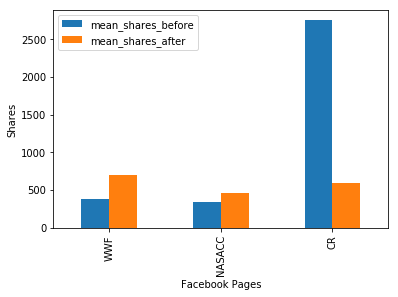

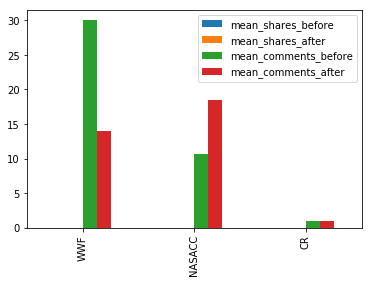

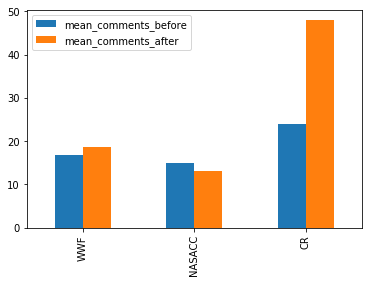

In [18]:
# Climate Change pages Analysis
tweet1 = '2017-04-22'
tweet2 = '2017-06-02'
tweet3 = '2017-12-29'

# Tweet 1
tweet1_frame = pd.DataFrame(index=['WWF','NASACC','CR'], columns=['mean_shares_before','mean_shares_after'])

tweet1_frame.loc['WWF','mean_shares_before'] = WWF.loc['2017-04-15':tweet1]['Shares'].mean()
tweet1_frame.loc['WWF','mean_shares_after'] = WWF.loc[tweet1:'2017-04-29']['Shares'].mean()

#tweet1_frame.loc['WWF','mean_comments_before'] = WWF.loc['2017-04-15':tweet1]['Comment.ID'].mean()
#tweet1_frame.loc['WWF','mean_comments_after'] = WWF.loc[tweet1:'2017-04-29']['Comment.ID'].mean()

tweet1_frame.loc['NASACC','mean_shares_before'] = NASACC.loc['2017-04-15':tweet1]['Shares'].mean()
tweet1_frame.loc['NASACC','mean_shares_after'] = NASACC.loc[tweet1:'2017-04-29']['Shares'].mean()

#tweet1_frame.loc['NASACC','mean_comments_before'] = NASACC.loc['2017-04-15':tweet1]['Comment.ID'].mean()
#tweet1_frame.loc['NASACC','mean_comments_after'] = NASACC.loc[tweet1:'2017-04-29']['Comment.ID'].mean()

tweet1_frame.loc['CR','mean_shares_before'] = CR.loc['2017-04-15':tweet1]['Shares'].mean()
tweet1_frame.loc['CR','mean_shares_after'] = CR.loc[tweet1:'2017-04-29']['Shares'].mean()

#tweet1_frame.loc['CR','mean_comments_before'] = CR.loc['2017-04-15':tweet1]['Comment.ID'].mean()
#tweet1_frame.loc['CR','mean_comments_after'] = CR.loc[tweet1:'2017-04-29']['Comment.ID'].mean()

display(tweet1_frame)

ax=tweet1_frame.plot.bar()
ax.set_xlabel("Facebook Pages")
ax.set_ylabel("Shares")
fig = ax.get_figure()
#fig.savefig('/Users/Macbook/Desktop/ACCfig-1.pdf')


# Tweet 2
tweet2_frame = pd.DataFrame(index=['WWF','NASACC','CR'], columns=['mean_shares_before','mean_shares_after','mean_comments_before','mean_comments_after'])

#tweet2_frame.loc['WWF','mean_shares_before'] = WWF.loc['2017-05-26':tweet2]['Shares'].mean()
#tweet2_frame.loc['WWF','mean_shares_after'] = WWF.loc[tweet2:'2017-06-09']['Shares'].mean()

tweet2_frame.loc['WWF','mean_comments_before'] = WWF.loc['2017-05-26':tweet2]['Comment.ID'].mean()
tweet2_frame.loc['WWF','mean_comments_after'] = WWF.loc[tweet2:'2017-06-09']['Comment.ID'].mean()

#tweet2_frame.loc['NASACC','mean_shares_before'] = NASACC.loc['2017-05-26':tweet2]['Shares'].mean()
#tweet2_frame.loc['NASACC','mean_shares_after'] = NASACC.loc[tweet2:'2017-06-09']['Shares'].mean()

tweet2_frame.loc['NASACC','mean_comments_before'] = NASACC.loc['2017-05-26':tweet2]['Comment.ID'].mean()
tweet2_frame.loc['NASACC','mean_comments_after'] = NASACC.loc[tweet2:'2017-06-09']['Comment.ID'].mean()

#tweet2_frame.loc['CR','mean_shares_before'] = CR.loc['2017-05-26':tweet2]['Shares'].median()
#tweet2_frame.loc['CR','mean_shares_after'] = CR.loc[tweet2:'2017-06-09']['Shares'].median()

tweet2_frame.loc['CR','mean_comments_before'] = CR.loc['2017-05-26':tweet2]['Comment.ID'].mean()
tweet2_frame.loc['CR','mean_comments_after'] = CR.loc[tweet2:'2017-06-09']['Comment.ID'].mean()

display(tweet2_frame)

tweet2_frame.plot.bar()

# Tweet 3
tweet3_frame = pd.DataFrame(index=['WWF','NASACC','CR'], columns=['mean_comments_before','mean_comments_after'])

#tweet3_frame.loc['WWF','mean_shares_before'] = WWF.loc['2017-12-22':tweet3]['Shares'].mean()
#tweet3_frame.loc['WWF','mean_shares_after'] = WWF.loc[tweet3:'2018-01-05']['Shares'].mean()

tweet3_frame.loc['WWF','mean_comments_before'] = WWF.loc['2017-12-22':tweet3]['Comment.ID'].mean()
tweet3_frame.loc['WWF','mean_comments_after'] = WWF.loc[tweet3:'2018-01-05']['Comment.ID'].mean()

#tweet3_frame.loc['NASACC','mean_shares_before'] = NASACC.loc['2017-12-22':tweet3]['Shares'].mean()
#tweet3_frame.loc['NASACC','mean_shares_after'] = NASACC.loc[tweet3:'2018-01-05']['Shares'].mean()

tweet3_frame.loc['NASACC','mean_comments_before'] = NASACC.loc['2017-12-22':tweet3]['Comment.ID'].mean()
tweet3_frame.loc['NASACC','mean_comments_after'] = NASACC.loc[tweet3:'2018-01-05']['Comment.ID'].mean()

#tweet3_frame.loc['CR','mean_shares_before'] = CR.loc['2017-12-22':tweet3]['Shares'].median()
#tweet3_frame.loc['CR','mean_shares_after'] = CR.loc[tweet3:'2018-01-05']['Shares'].median()

tweet3_frame.loc['CR','mean_comments_before'] = CR.loc['2017-12-22':tweet3]['Comment.ID'].mean()
tweet3_frame.loc['CR','mean_comments_after'] = CR.loc[tweet3:'2018-01-05']['Comment.ID'].mean()

display(tweet3_frame)

tweet3_frame.plot.bar()

,mean_shares_before,mean_shares_after,mean_comments_before,mean_comments_after
IRC,209.5,357.625,10.5,12.75
amnesty,1606.6,5632.4,19,15.2
ACLU,5620.75,3281.38,135.25,104.875


,mean_shares_before,mean_shares_after,mean_comments_before,mean_comments_after
IRC,16302.4,3746.25,38.5,61.875
amnesty,192.667,6353,19,14
ACLU,74630.6,61962.4,98.375,73.125


,mean_shares_before,mean_shares_after,mean_comments_before,mean_comments_after
IRC,87.5,120,13.5,9.83333
amnesty,427.143,158.333,27.5714,22.5
ACLU,5696.25,3682.17,157.5,141.167


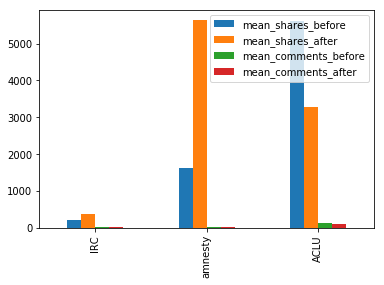

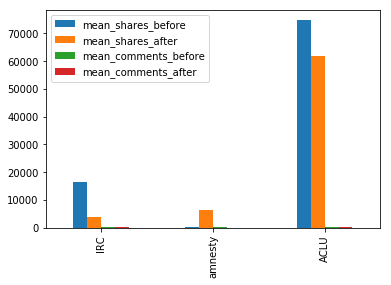

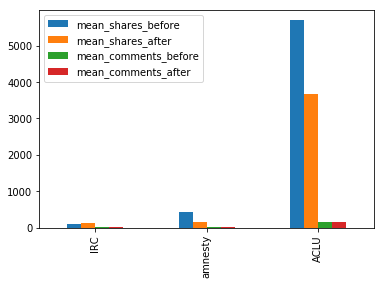

In [16]:
# Immigration pages Analysis

# Getting the top three most retweeted Trump immigration tweets
trump_tweets = pd.read_csv('/Users/Macbook/Documents/Oxford/2 Hillary/Accessing and Wrangling/Accessing/dttweets.csv')
trump_tweets = trump_tweets[trump_tweets['text'].str.contains("immigration")]
#print(trump_tweets.nlargest(4, 'retweets', keep='first'))

itweet1 = '2018-01-20' #44943 retweets
itweet2 = '2017-01-29' #41132 retweets
itweet3 = '2018-02-06' #36054 retweets

# Tweet 1
itweet1_frame = pd.DataFrame(index=['IRC','amnesty','ACLU'], columns=['mean_shares_before','mean_shares_after','mean_comments_before','mean_comments_after'])

itweet1_frame.loc['ACLU','mean_shares_before'] = ACLU.loc['2018-01-13':itweet1]['Shares'].mean()
itweet1_frame.loc['ACLU','mean_shares_after'] = ACLU.loc[itweet1:'2018-01-27']['Shares'].mean()

itweet1_frame.loc['ACLU','mean_comments_before'] = ACLU.loc['2018-01-13':itweet1]['Comment.ID'].mean()
itweet1_frame.loc['ACLU','mean_comments_after'] = ACLU.loc[itweet1:'2018-01-27']['Comment.ID'].mean()

itweet1_frame.loc['amnesty','mean_shares_before'] = amnesty.loc['2018-01-13':itweet1]['Shares'].mean()
itweet1_frame.loc['amnesty','mean_shares_after'] = amnesty.loc[itweet1:'2018-01-27']['Shares'].mean()

itweet1_frame.loc['amnesty','mean_comments_before'] = amnesty.loc['2018-01-13':itweet1]['Comment.ID'].mean()
itweet1_frame.loc['amnesty','mean_comments_after'] = amnesty.loc[itweet1:'2018-01-27']['Comment.ID'].mean()

itweet1_frame.loc['IRC','mean_shares_before'] = IRC.loc['2018-01-13':itweet1]['Shares'].mean()
itweet1_frame.loc['IRC','mean_shares_after'] = IRC.loc[itweet1:'2018-01-27']['Shares'].mean()

itweet1_frame.loc['IRC','mean_comments_before'] = IRC.loc['2018-01-13':itweet1]['Comment.ID'].mean()
itweet1_frame.loc['IRC','mean_comments_after'] = IRC.loc[itweet1:'2018-01-27']['Comment.ID'].mean()

display(itweet1_frame)

itweet1_frame.plot.bar()

# Tweet 2
itweet2_frame = pd.DataFrame(index=['IRC','amnesty','ACLU'], columns=['mean_shares_before','mean_shares_after','mean_comments_before','mean_comments_after'])

itweet2_frame.loc['ACLU','mean_shares_before'] = ACLU.loc['2017-01-22':itweet2]['Shares'].mean()
itweet2_frame.loc['ACLU','mean_shares_after'] = ACLU.loc[itweet2:'2017-02-05']['Shares'].mean()

itweet2_frame.loc['ACLU','mean_comments_before'] = ACLU.loc['2017-01-22':itweet2]['Comment.ID'].mean()
itweet2_frame.loc['ACLU','mean_comments_after'] = ACLU.loc[itweet2:'2017-02-05']['Comment.ID'].mean()

itweet2_frame.loc['amnesty','mean_shares_before'] = amnesty.loc['2017-01-22':itweet2]['Shares'].mean()
itweet2_frame.loc['amnesty','mean_shares_after'] = amnesty.loc[itweet2:'2017-02-05']['Shares'].mean()

itweet2_frame.loc['amnesty','mean_comments_before'] = amnesty.loc['2017-01-22':itweet2]['Comment.ID'].mean()
itweet2_frame.loc['amnesty','mean_comments_after'] = amnesty.loc[itweet2:'2017-02-05']['Comment.ID'].mean()

itweet2_frame.loc['IRC','mean_shares_before'] = IRC.loc['2017-01-22':itweet2]['Shares'].mean()
itweet2_frame.loc['IRC','mean_shares_after'] = IRC.loc[itweet2:'2017-02-05']['Shares'].mean()

itweet2_frame.loc['IRC','mean_comments_before'] = IRC.loc['2017-01-22':itweet2]['Comment.ID'].mean()
itweet2_frame.loc['IRC','mean_comments_after'] = IRC.loc[itweet2:'2017-02-05']['Comment.ID'].mean()

display(itweet2_frame)

itweet2_frame.plot.bar()

# Tweet 3
itweet3_frame = pd.DataFrame(index=['IRC','amnesty','ACLU'], columns=['mean_shares_before','mean_shares_after','mean_comments_before','mean_comments_after'])

itweet3_frame.loc['ACLU','mean_shares_before'] = ACLU.loc['2018-01-30':itweet3]['Shares'].mean()
itweet3_frame.loc['ACLU','mean_shares_after'] = ACLU.loc[itweet3:'2018-02-13']['Shares'].mean()

itweet3_frame.loc['ACLU','mean_comments_before'] = ACLU.loc['2018-01-30':itweet3]['Comment.ID'].mean()
itweet3_frame.loc['ACLU','mean_comments_after'] = ACLU.loc[itweet3:'2018-02-13']['Comment.ID'].mean()

itweet3_frame.loc['amnesty','mean_shares_before'] = amnesty.loc['2018-01-30':itweet3]['Shares'].mean()
itweet3_frame.loc['amnesty','mean_shares_after'] = amnesty.loc[itweet3:'2018-02-13']['Shares'].mean()

itweet3_frame.loc['amnesty','mean_comments_before'] = amnesty.loc['2018-01-30':itweet3]['Comment.ID'].mean()
itweet3_frame.loc['amnesty','mean_comments_after'] = amnesty.loc[itweet3:'2018-02-13']['Comment.ID'].mean()

itweet3_frame.loc['IRC','mean_shares_before'] = IRC.loc['2018-01-30':itweet3]['Shares'].mean()
itweet3_frame.loc['IRC','mean_shares_after'] = IRC.loc[itweet3:'2018-02-13']['Shares'].mean()

itweet3_frame.loc['IRC','mean_comments_before'] = IRC.loc['2018-01-30':itweet3]['Comment.ID'].mean()
itweet3_frame.loc['IRC','mean_comments_after'] = IRC.loc[itweet3:'2018-02-13']['Comment.ID'].mean()

display(itweet3_frame)

itweet3_frame.plot.bar()

In [14]:
before_mean1 = ACLU.loc['2017-01-22':itweet2]['Shares'].tolist()
after_mean1 = ACLU.loc[itweet2:'2017-02-05']['Shares'].tolist()

before_mean2 = ACLU.loc['2018-01-30':itweet3]['Shares'].tolist()
after_mean2 = ACLU.loc[itweet3:'2018-02-13']['Shares'].tolist()

before_mean3 = ACLU.loc['2018-01-13':itweet1]['Shares'].tolist()
after_mean3 = ACLU.loc[itweet1:'2018-01-27']['Shares'].tolist()

before_mean = before_mean1 + before_mean2 + before_mean3
after_mean = after_mean1 + after_mean2 + after_mean3

print(sum(before_mean) / len(before_mean))
print(sum(after_mean) / len(after_mean))

t=stats.ttest_ind(before_mean,after_mean)

print(t)

28649.208333333332
24729.227272727272
Ttest_indResult(statistic=0.14325105718073911, pvalue=0.88674594642320781)
